In [1]:
include("jl/init_default.jl");

Any...) in module Base at util.jl:334 overwritten in module Logging at /home/skariel/.julia/v0.4/Logging/src/Logging.jl:61.
16-פבר 23:34:30:INFO:root:N=74293025 min(m)=46.538624 max(m)=959026.75
16-פבר 23:34:30:INFO:root:rescaling masses
16-פבר 23:34:31:INFO:root:N=74293025 min(m)=50.036606 max(m)=1.0311101e6


In [2]:
include("jl/all.jl")
pop_realization()

In [3]:
opos_i = SharedArray(Float32, size(pos));

In [4]:
opos_i.s[:,:] = pos.s[:,:];

In [5]:
back_optimize_zeld_vs_pushed_pos!(rho, opos_i, pos, m, 0.01, 1.0, 50, 0.21, 100);

16-פבר 23:34:43:INFO:root:optzel start a_from=0.01 a_to=1.0 end_meandx=100 fracmov=0.21
16-פבר 23:34:43:INFO:root:optzel a_i=0.9797959183673469
16-פבר 23:34:44:INFO:root:simzel start from a=0.9797959183673469 to a=1.0
16-פבר 23:35:05:INFO:root:simzel dim 1
16-פבר 23:35:16:INFO:root:simzel dim 2
16-פבר 23:35:25:INFO:root:simzel dim 3
16-פבר 23:35:35:INFO:root:simzel end
16-פבר 23:35:40:INFO:root:optzel step=1 mdx=65.40463
16-פבר 23:35:40:INFO:root:optzel a_i=0.9595918367346938
16-פבר 23:35:40:INFO:root:simzel start from a=0.9595918367346938 to a=1.0
16-פבר 23:36:02:INFO:root:simzel dim 1
16-פבר 23:36:12:INFO:root:simzel dim 2
16-פבר 23:36:22:INFO:root:simzel dim 3
16-פבר 23:36:32:INFO:root:simzel end
16-פבר 23:36:37:INFO:root:optzel step=1 mdx=119.24265
16-פבר 23:36:37:INFO:root:simzel start from a=0.9595918367346938 to a=1.0
16-פבר 23:37:01:INFO:root:simzel dim 1
16-פבר 23:37:11:INFO:root:simzel dim 2
16-פבר 23:37:21:INFO:root:simzel dim 3
16-פבר 23:37:31:INFO:root:simzel end
16-פבר 23

In [6]:
mean_std_dx_vs_pushed_pos(opos_i)

(2992.104f0,2285.9148f0)

In [7]:
kd = get_kd(pos);

In [8]:
to_rho!(opos_i,m, rho);
rho_to_1st_order_vel_pot!(rho);

In [9]:
get_1st_order_comoving_vel!(c, 0.01, 1, rho);
get_slope_std_smoothed(kd, real(c), vx, pos, 10000.0, 100000)

(0.09550078510461486,93.50237101184976)

In [16]:
pos.s[:,:] = opos_i.s[:,:]
simulate_zeld!(rho, pos, m, 0.01, 0.3);

17-פבר 07:34:15:INFO:root:simzel start from a=0.01 to a=0.3
17-פבר 07:34:36:INFO:root:simzel dim 1
17-פבר 07:34:43:INFO:root:simzel dim 2
17-פבר 07:34:51:INFO:root:simzel dim 3
17-פבר 07:34:59:INFO:root:simzel end


In [17]:
to_rho!(pos,m, rho);

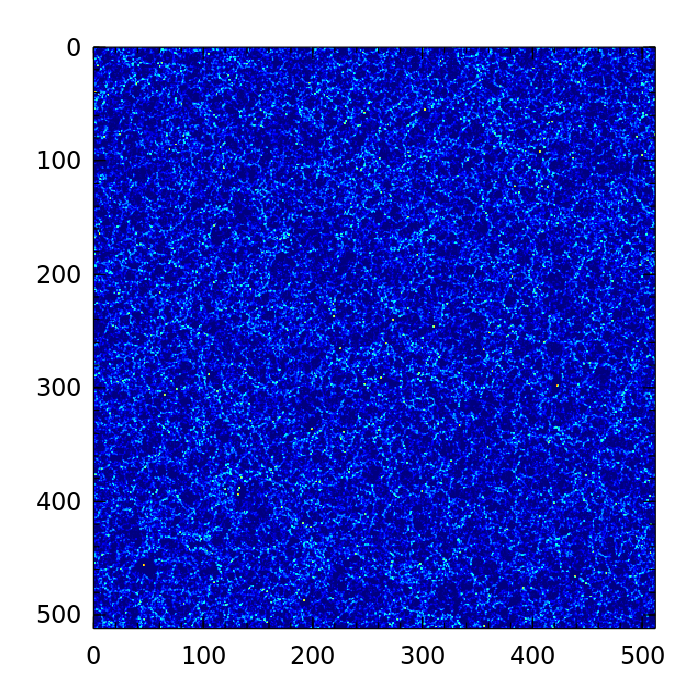

In [18]:
imrho = real(rho[:,:,254]) + real(rho[:,:,255]) + real(rho[:,:,256])
Winston.set_default_plot_size(700,700)
imagesc(log10(1e-8+imrho))

In [19]:
to_delta!(rho);

In [20]:
corr = get_correlation(rho);

In [ ]:
pop_realization()
to_delta!(rho)
corr_org = get_correlation(rho);

In [ ]:
semilogy(xl/1000, corr*1.5)
hold(true)
semilogy(xl/1000, corr_org, "red")
hold(false)
xlim(50,200)
grid(true)
xlabel("Mpc/h")
ylabel("\\xi")